# 739. 每日温度

给定一个整数数组 temperatures ，表示每天的温度，返回一个数组 answer ，其中 answer[i] 是指对于第 i 天，下一个更高温度出现在几天后。如果气温在这之后都不会升高，请在该位置用 0 来代替。

 

示例 1:

输入: temperatures = [73,74,75,71,69,72,76,73]
输出: [1,1,4,2,1,1,0,0]
示例 2:

输入: temperatures = [30,40,50,60]
输出: [1,1,1,0]
示例 3:

输入: temperatures = [30,60,90]
输出: [1,1,0]
 

提示：

1 <= temperatures.length <= 105
30 <= temperatures[i] <= 100

In [4]:
def f739(temperatures):
    n = len(temperatures)
    ans = [0] * n
    stack = []
    # 从前往后版本
    for i, t in enumerate(temperatures):#t = temperature[i]
        while stack and t >= temperatures[stack[-1]]:
            prev_index = stack.pop()  # 弹出栈顶元素索引
            ans[prev_index] = i - prev_index  # 计算等待天数并存储
        stack.append(i)
    return ans 

    # # 从后向前版本
    # for i in range(n-1, -1, -1):
    #     t = temperatures[i]
    #     while stack and t >= temperatures[stack[-1]]:
    #         # 如果 新的数据 t 大于最右边元素。
    #         # 则删除 原本的最右元素，维护一个单调元素
    #         stack.pop()
    #     if stack:
    #         ans[i] = stack[-1] - i
    #     stack.append(i)
    # return ans


temperatures = [73,74,75,71,69,72,76,73]
f739(temperatures)


[1, 1, 4, 2, 1, 1, 0, 0]

# 42. 接雨水

给定 n 个非负整数表示每个宽度为 1 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。

 

示例 1：

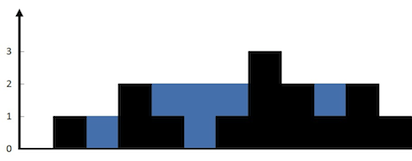

输入：height = [0,1,0,2,1,0,1,3,2,1,2,1]
输出：6
解释：上面是由数组 [0,1,0,2,1,0,1,3,2,1,2,1] 表示的高度图，在这种情况下，可以接 6 个单位的雨水（蓝色部分表示雨水）。 
示例 2：

输入：height = [4,2,0,3,2,5]
输出：9
 

提示：

n == height.length
1 <= n <= 2 * 104
0 <= height[i] <= 105

In [18]:
def f42_1(height):
    # 双指针
    n = len(height)
    ans = 0
    l, r = 0, n-1
    l_max, r_max = 0, 0
    while l < r:
        l_max = max(l_max, height[l])
        r_max = max(r_max, height[r])
        if l_max < r_max:
            ans += l_max - height[l]
            l += 1
        else:
            ans += r_max - height[r]
            r -= 1
    return ans 

def f42_2(height):
    # 两个空间
    n = len(height)
    pre_max = [0] * n
    pre_max[0] = height[0]
    for i in range(1, n):
        pre_max[i] = max(pre_max[i-1], height[i])
    
    suf_max = [0] * n
    suf_max[-1] = height[-1]
    for i in range(n-2, -1, -1):
        suf_max[i] = max(suf_max[i+1], height[i])
    
    ans = 0
    for h, pre, suf in zip(height, pre_max, suf_max):
        ans += min(pre, suf) - h
    return ans

def f42_3(height):
    # 单调栈的横着计算
    ans = 0
    st = []
    for i, h in enumerate(height):
        while st and h >= height[st[-1]]:
            bottom_h = height[st.pop()]
            if not st:  # len(st) == 0
                break
            left = st[-1]
            dh = min(height[left], h) - bottom_h  # 面积的高
            ans += dh * (i - left - 1)
        st.append(i)
    return ans

height = [0,1,0,2,1,0,1,3,2,1,2,1]
print(f42_1(height))
print(f42_2(height))
print(f42_3(height))

6
6
6
